## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
len(df[((df['group']=='treatment')&(df['landing_page']!='new_page'))|((df['group']!='treatment')&(df['landing_page']=='new_page'))])

3893

f. Do any of the rows have missing values?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
df2 = df[((df['group']=='treatment')&(df['landing_page']=='new_page')) | ((df['group']=='control')&(df['landing_page']=='old_page'))]
df2.reset_index(inplace=True)

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 6 columns):
index           290585 non-null int64
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(3), object(3)
memory usage: 13.3+ MB


In [15]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2[df2['user_id'].duplicated()].user_id

2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2['user_id']==773192]

,index,user_id,timestamp,group,landing_page,converted
1876,1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2.drop_duplicates(subset='user_id',inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 6 columns):
index           290584 non-null int64
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(3), object(3)
memory usage: 15.5+ MB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2[df2['group']=='control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2[df2['group']=='treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
len(df2[df2['landing_page']=='new_page'])/len(df2['landing_page'])

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Considering the probabilities above, it can be said that there is not enough evidence to prove that new treatment page leads to more conversions. The conclusion is based on the above result which highlights that the probability of an individual from the control group converting is 12.04% which is infact marginally higher than the probability of 11.88% of an individual from the treatment group converting. This holds true provided the probability of an individual recieving a new page is almost 50% and more importantly, the fact that the data has been cleaned to ensure all control group members recieve the old page and all treatment group members recieve the new page **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis: The old page is better or equally good as the new page**

**Alternative Hypothesis: The new page is better than the old page**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
p_new = df2.converted.mean()
print(p_new)

0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old = df2.converted.mean()
print(p_old)

0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
n_new = len(df2[df2['landing_page']=='new_page'])
print(n_new)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
n_old = len(df2[df2['landing_page']=='old_page'])
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([0,1], size = n_new, p = [1-p_new, p_new])

print(new_page_converted)

[0 0 0 ..., 0 0 0]


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([0,1], size = n_old, p = [1-p_old, p_old])

print(old_page_converted)

[0 0 0 ..., 0 0 1]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
new_page_converted.mean() - old_page_converted.mean()

0.0008373751223778314

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [30]:
p_diffs = []
for i in range(10000):
    new_page_bootstrap = np.random.choice([0,1], size = n_new, p = [1-p_new, p_new])
    old_page_bootstrap = np.random.choice([0,1], size = n_old, p = [1-p_old, p_old])
    p_diffs.append(new_page_bootstrap.mean() - old_page_bootstrap.mean())
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0,0.5,'Number of occurences')

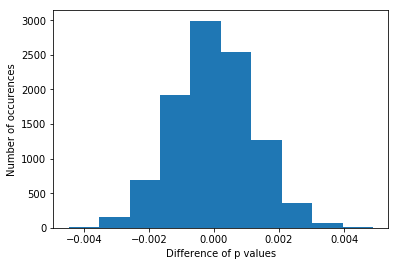

In [31]:
plt.hist(p_diffs)
plt.xlabel('Difference of p values')
plt.ylabel('Number of occurences')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.90380000000000005

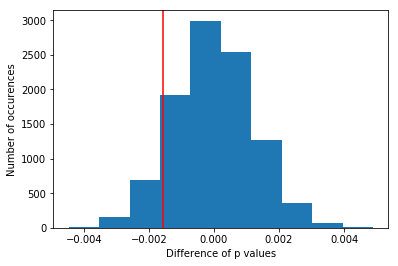

In [32]:
obs_diff = df2[df2['group']=='treatment'].converted.mean() - df2[df2['group']=='control'].converted.mean()

plt.hist(p_diffs)
plt.xlabel('Difference of p values')
plt.axvline(x=(obs_diff), color = 'red', label = 'Observed Difference')
plt.ylabel('Number of occurences')
(p_diffs > obs_diff).mean()

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value computed in section 'j' is the probability of observing data in favor of the alternative given the null hypothesis is true. This is also called the "p-value". Now, if this p-value is less than the selected Type I error threshold, then there is evidence to reject the null and choose the alternative. Else, we fail to reject the null hypothesis. In our case, since our p-value (0.90) is much greater than the alpha (5%), we did not reject the null. There is no significant evidence that the new page generates more traffic.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df2[df2['group']=='control'].converted.sum()
convert_new = df2[df2['group']=='treatment'].converted.sum()
n_old = len(df2[df2['landing_page']=='old_page'])
n_new = len(df2[df2['landing_page']=='new_page'])
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [40]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='smaller')
print('Z-score: ', z_score)
print('P-value: ', p_value)

Z-score:  -1.31092419842
P-value:  0.094941687241


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The Z-score signifies the standard deviation from the mean. A higher Z-score indicates a higher deviation from the mean. The Z-score for our dataset is 1.312 which is quite large. Also, the p-value is quite large, with a value of 0.905. At this value, we fail to reject the null hypothesis. Our result is similar to what we got in part j., where the p-value were around 0.903.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression since our variable has only 2 possible outcomes.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
df2['intercept'] = 1
dummy = pd.get_dummies(df2['group'])
df2['ab_page'] = dummy['treatment']
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
mdl = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
result = mdl.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:50:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The null and the alternative hypothesis of our regression model are listed below:**

**Null Hypothesis: The type of page has no impact on the conversion rate**

**Alternative Hypothesis: The type of page has a significant impact on the conversion rate.**

**Smaller p values in the regression model results indicate that the dependent variable is statistically significant in relating to the response variable. In our case, this value is 0.19 which is relatively large and this we cannot say the the ab_page is significant in relating to the conversion rate. Thus the P>|z| value of 0.19 is large enough to stick with the null hypothesis.
The null and alternate hypothesis in Part 2 on the other hand were:
Null Hypothesis: The old page is better or equally good as the new page
Alternative Hypothesis: The new page is better than the old page
This is completely different from our regression model hypothesis**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Addition of further variables which might influnce the conversion rate will be a good practice because having multiple dependent factors in our data will help us to create a better model for the prediction. The disadvantage though, is when the additional factors are not independent or if these factors have less significant impact on the prediction of conversion rate. In these cases, the model becomes much more complicated, and impacts its performance. Thus, if the gain is very small after adding additional factors in our model, we can rather train a model without them.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
df_country = pd.read_csv('countries.csv')
df2 = df2.merge(df_country, on='user_id', how='left')
df2.head()

,index,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [51]:
df2.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
countries = pd.get_dummies(df2['country'])
df2['country_US'] = countries['US']
df2['country_CA'] = countries['CA']
df2.head(10)

,index,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,country_US,country_CA
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,1,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,1,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,1,0
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,1,0
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,1,0
5,5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,1,0
6,6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,0,1
7,7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,1,0
8,8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,0
9,9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,0,1


In [55]:
mdl = sm.Logit(df2['converted'], df2[['intercept','ab_page', 'country_US', 'country_CA']])
result = mdl.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:               2.323e-05
Time:                        14:54:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_US    -0.0099      0.013     -0.743      0.457      -0.036       0.016
country_CA    -0.0506      0.028     -1.784      0.074      -0.106       0.005
==============================================================================
"""

### Conclusion of Above Results

As seen above, the p values of the countries too are on the higher side and thus we cannot say that the country data is significant in realting to the conversion rate (our response variable). It also shows us the the addition of country data has not had any effect on the pvalue of ab_page. 

## Overall Conclusion

This conclusion takes into account that the data had been cleaned and there were no inconsistencies present. There was no bias of any kind in the data and no assumptions were made in the data.
The hypothesis testing results clearly highlighted that the null hypothesis cannot be rejected. The regression model also clearly highlights that the type of page has no significant relation to the conversion rate.
Thus, the overall conclusion that we can draw from our analysis above is that **there is no evidence that the new page will perform better than the old page. The company should stick with the null hypothesis and not move to the new page**


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])